# 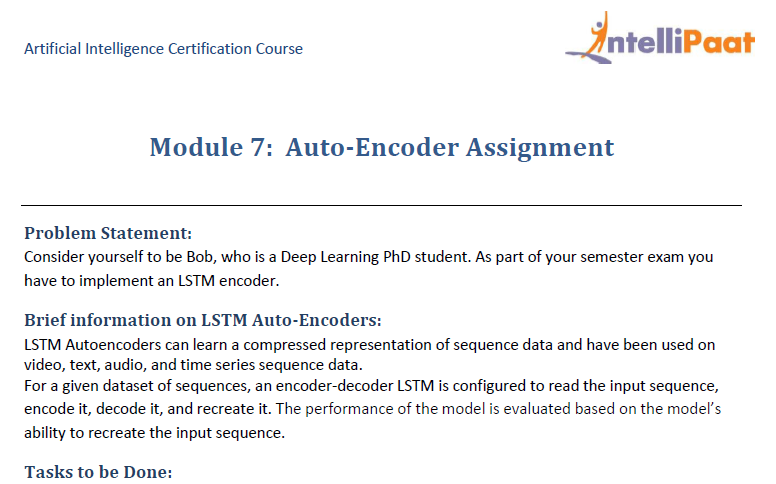

### A. Start off by creating an input sequence of numbers [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    a. Build an LSTM RNN model on top of this data. Compile the model with ‘adam’ to be the optimizer and loss to be ‘mse’
    b. Fit the model on data and set the number of epochs to be 300
    c. Predict the values and verify it with the input data

#### A. 1. Importing Required Library

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from matplotlib import pyplot as plt
from keras.models import Model
import tensorflow as tf
from keras.utils import plot_model

#### A. 2. Preparing dataset - input sequence of numbers 

In [2]:
sequence = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
sequence

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

#### A.3. As required for LSTM networks, we require to reshape an input data into [samples, timesteps and features]. In this example, the n_features is 1. We will make timesteps = 1. With this, the resultant n_samples is 9.

In [3]:
timesteps = len(sequence)
timesteps

9

In [4]:
samples = 1
features  = 1

#### A. 3. Created a function to_look_back with default look back 1 for Output data

In [5]:
X_train = sequence.reshape((samples,timesteps, features))
X_train

array([[[0.1],
        [0.2],
        [0.3],
        [0.4],
        [0.5],
        [0.6],
        [0.7],
        [0.8],
        [0.9]]])

In [6]:
def to_look_back (x, seq_size=1):
    y_values = []
    for i in range(len(x)-seq_size):
        y_values.append(x[i+seq_size])
    return np.array(y_values)


In [7]:
# prepare output sequence
Y_train = to_look_back(x=sequence,seq_size=1) 
Y_train

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [8]:
output_timesteps = len(Y_train)
output_timesteps

8

In [9]:
Y_train = Y_train.reshape((samples,timesteps-1, features))
Y_train

array([[[0.2],
        [0.3],
        [0.4],
        [0.5],
        [0.6],
        [0.7],
        [0.8],
        [0.9]]])

In [10]:
Y_train.shape

(1, 8, 1)

In [11]:
# del model

### A.a. Build an LSTM RNN model on top of this data. Compile the model with ‘adam’ to be the optimizer and loss to be ‘mse’

### A.a.1. Build an LSTM RNN model

In [12]:
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(timesteps,features), return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(RepeatVector(timesteps)) #output_timesteps
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam',  #tf.keras.optimizers.Adam(learning_rate=0.001), #
              loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 9, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 repeat_vector (RepeatVecto  (None, 9, 64)             0         
 r)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 9, 64)             33024     
                                                                 
 lstm_3 (LSTM)               (None, 9, 128)            98816     
                                                                 
 time_distributed (TimeDist  (None, 9, 1)              129       
 ributed)                                               

### A.a.2. Build an LSTM RNN model

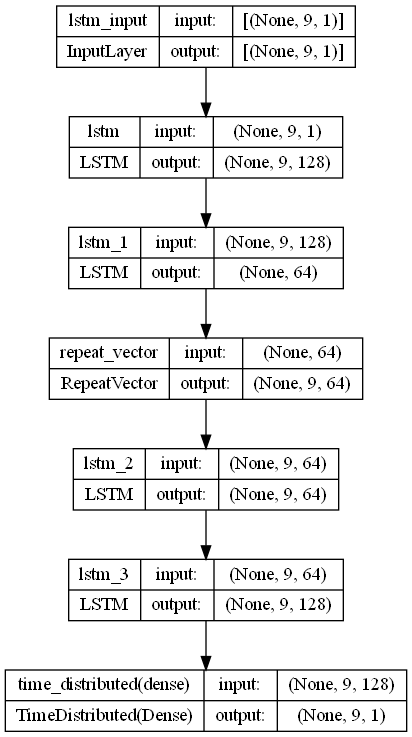

In [13]:
plot_model(model, show_shapes=True, to_file='predict_lstm_autoencoder.png')

## A. b. Fit the model on data and set the number of epochs to be 300

In [14]:
model.fit(X_train, X_train, epochs=300, batch_size=34, verbose=0)

## A. c. Predict the values and verify it with the input data

In [15]:
yhat = model.predict(X_train, verbose=0)
print('***************** Predicted ******************')
print(np.round(yhat,3))
print('***************** Actual ******************')
print(np.round(X_train, 3))

***************** Predicted ******************
[[[0.103]
  [0.192]
  [0.292]
  [0.396]
  [0.502]
  [0.607]
  [0.707]
  [0.802]
  [0.892]]]
***************** Actual ******************
[[[0.1]
  [0.2]
  [0.3]
  [0.4]
  [0.5]
  [0.6]
  [0.7]
  [0.8]
  [0.9]]]


In [16]:
y_pred = yhat.reshape(-1, 1)
y_pred

array([[0.10307134],
       [0.19212666],
       [0.29163727],
       [0.39633802],
       [0.50227344],
       [0.6065331 ],
       [0.7070447 ],
       [0.8024054 ],
       [0.89179575]], dtype=float32)

In [17]:
X_train_plot = X_train.reshape(-1, 1)

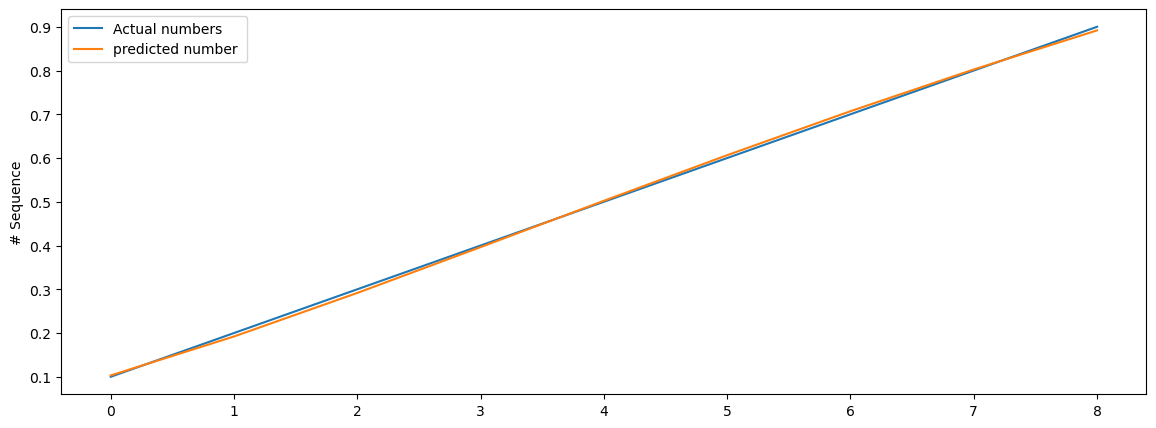

In [18]:
plt.figure(figsize=(14,5))
plt.plot(X_train_plot, label = 'Actual numbers')
plt.plot(y_pred, label = 'predicted number ')
plt.ylabel('# Sequence')
plt.legend()
plt.show()